# CSE4212: Artificail Intelligence Lab

Name: Md. Ahanaf Arif Khan

ID: 1910676110

Session: 2018-19

**Date:** 15 February, 2024

# Lab Work:

- Load the VGG16 model from Keras with ImageNet weights.
- Implement a model similar to the VGG16 model.
- Implement the VGG16 model from scratch, then transfer the imagenet weights to the implemented VGG16 model.
- Create a model with some layers of the VGG16 model and some custom layers. Load the VGG16 layer weights onto the custom model
- Load the MNIST Dataset

# Import Dependencies

In [14]:
import keras
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from keras import Input
from keras.applications import vgg16
from keras.datasets.mnist import load_data
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# VGG16 Model From Keras

In [2]:
vgg16_model = vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# VGG16-like Model Implementation

In [3]:
inputs = Input(shape=(224, 224, 3))

x = Conv2D(filters=32, kernel_size=(5, 5),
            padding='same', activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(3, 3),
            padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=64, kernel_size=(5, 5),
            padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3),
            padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=128, kernel_size=(5, 5),
            padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3),
            padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='relu')(x)

vgg_like = keras.Model(inputs, outputs)
vgg_like.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                             

# VGG16 Custom Implementation

In [4]:
inputs = Input(shape=(224,224,3))

x = Conv2D(filters=64, kernel_size=(3,3), 
           padding='same', activation='relu')(inputs)
x = Conv2D(filters=64, kernel_size=(3,3),
           padding='same', activation='relu')(x)
x = MaxPooling2D()(x)


x = Conv2D(filters=128, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = MaxPooling2D()(x)


x = Conv2D(filters=256, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = MaxPooling2D()(x)


x = Conv2D(filters=512, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = MaxPooling2D()(x)


x = Conv2D(filters=512, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = MaxPooling2D()(x)


x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(1000, activation='softmax')(x)

custom_vgg16 = keras.Model(inputs, x)
custom_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     147584    
                                                           

## Setting weights of Custom VGG16 model to ImageNet weights

In [5]:
for i in range(len(custom_vgg16.layers)):
    # print(custom_vgg16.layers[i].name)
    custom_vgg16.layers[i].set_weights(vgg16_model.layers[i].get_weights())

# Custom model with some layers of the VGG16 Model

In [9]:
inputs = Input(shape=(224, 224, 3))

x = Conv2D(filters=64, kernel_size=(3, 3),
           padding='same', activation='relu')(inputs)
x = Conv2D(filters=64, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = MaxPooling2D()(x)


x = Conv2D(filters=128, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3),
           padding='same', activation='relu')(x)
x = MaxPooling2D((4,4))(x)


x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

partial_vgg16 = keras.Model(inputs, x)
partial_vgg16.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_19 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 128)     147584    
                                                           

## Setting weights of Custom model with VGG16 model

In [10]:
for i in range(7):
    # print(custom_vgg16.layers[i].name)
    partial_vgg16.layers[i].set_weights(vgg16_model.layers[i].get_weights())

# Load the MNIST Dataset

In [46]:
(trainX, trainY), (testX, testY) = load_data()

print(f'trainX shape: {trainX.shape}, trainY shape: {trainY.shape}')
print(f'trainX dtype: {trainX.dtype}, trainY dtype: {trainY.dtype}')
print(f'trainX range: ({np.min(trainX)} - {np.max(trainX)}), trainY range: ({np.min(trainY)} - {np.max(trainY)})')

print(f'testX shape: {testX.shape}, testY shape: {testY.shape}')
print(f'testX dtype: {trainX.dtype}, testY dtype: {testY.dtype}')
print(f'testX range: ({np.min(testX)} - {np.max(testX)}), testY range: ({np.min(testY)} - {np.max(testY)})')

trainX shape: (60000, 28, 28), trainY shape: (60000,)
trainX dtype: uint8, trainY dtype: uint8
trainX range: (0 - 255), trainY range: (0 - 9)
testX shape: (10000, 28, 28), testY shape: (10000,)
testX dtype: uint8, testY dtype: uint8
testX range: (0 - 255), testY range: (0 - 9)


## Plot samples from dataset

In [47]:
# Function to plot dataset samples from the 
# train and test sets
def plot_samples(X, Y):
    plt.figure(figsize=(10,10))

    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(trainX[i], cmap='gray')
        plt.axis('off')
        plt.title(f'{trainY[i]}')
    plt.show()

Plot from training set

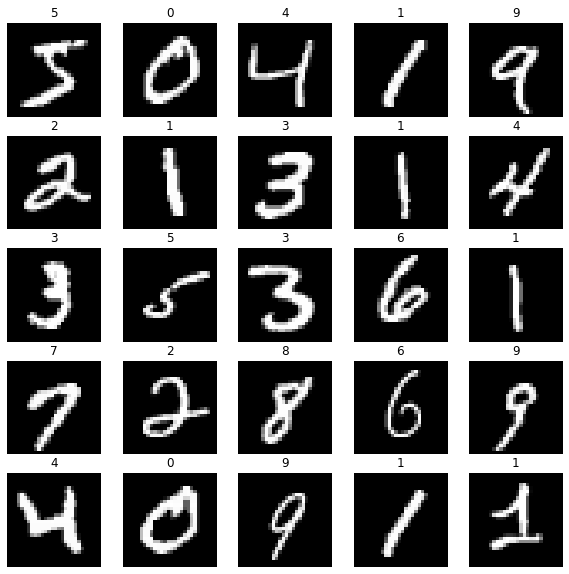

In [48]:
plot_samples(trainX, trainY)

Plot from test set

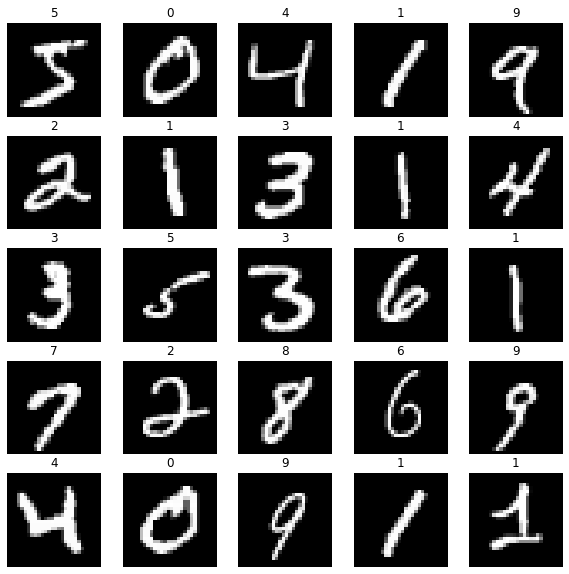

In [49]:
plot_samples(testX, testY)

## Preprocessing Data

In [56]:
def process_data(X, Y):
    # Perform One-Hot Encoding on the Train and Test Labels
    Y = to_categorical(Y, num_classes=10)
    
    # Convert inputs from 3D to 4D
    X = np.expand_dims(X, -1)
    return (X, Y)


trainX, onehot_trainY = process_data(trainX, trainY)
testX, onehot_testY = process_data(testX, testY)


print(f'trainX shape: {trainX.shape}, trainY shape: {trainY.shape}')
print(f'trainX dtype: {trainX.dtype}, trainY dtype: {trainY.dtype}')
print(f'trainX range: ({np.min(trainX)} - {np.max(trainX)}), trainY range: ({np.min(trainY)} - {np.max(trainY)})')

print(f'testX shape: {testX.shape}, testY shape: {testY.shape}')
print(f'testX dtype: {trainX.dtype}, testY dtype: {testY.dtype}')
print(f'testX range: ({np.min(testX)} - {np.max(testX)}), testY range: ({np.min(testY)} - {np.max(testY)})')

trainX shape: (60000, 28, 28, 1), trainY shape: (60000,)
trainX dtype: uint8, trainY dtype: uint8
trainX range: (0 - 255), trainY range: (0 - 9)
testX shape: (10000, 28, 28, 1), testY shape: (10000,)
testX dtype: uint8, testY dtype: uint8
testX range: (0 - 255), testY range: (0 - 9)


Print onehot encoded labels

In [51]:
print(onehot_testY[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [52]:
print(onehot_trainY[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Train a simple model using the MNIST dataset

Define the model and show its summary

In [63]:
def build_my_cnn():
    inputs = Input(shape=(28,28,1))
    x = Conv2D(filters=4, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    x = Flatten()(x)
    outputs = Dense(10, activation='softmax')(x)
    
    model = keras.Model(inputs, outputs)
    return model

In [64]:
model = build_my_cnn()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 4)         40        
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                31370     
                                                                 
Total params: 31,410
Trainable params: 31,410
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model with the training set

In [65]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics='accuracy'
)

In [66]:
model.fit(trainX, onehot_trainY, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 15s 8ms/step - loss: 1.0766 - accuracy: 0.8954 - val_loss: 0.2345 - val_accuracy: 0.9410
Epoch 2/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.1753 - accuracy: 0.9513 - val_loss: 0.1675 - val_accuracy: 0.9547
Epoch 3/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.1237 - accuracy: 0.9613 - val_loss: 0.1606 - val_accuracy: 0.9557
Epoch 4/5
1688/1688 [==============================] - 14s 9ms/step - loss: 0.1008 - accuracy: 0.9678 - val_loss: 0.1560 - val_accuracy: 0.9572
Epoch 5/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0855 - accuracy: 0.9721 - val_loss: 0.1516 - val_accuracy: 0.9613


Evaluate the performance of the model with the test set

In [67]:
model.evaluate(testX, onehot_testY)

313/313 [==============================] - 2s 5ms/step - loss: 0.1590 - accuracy: 0.9565


[0.15896742045879364, 0.9564999938011169]